In [1]:
import numpy as np
import math
import random
import tkinter as tk

In [2]:
#constantes
FPS = 60
dt = 1/60
altura_caixa = 800
largura_caixa = 600

In [3]:
class Particula:
    def __init__(self, massa, raio, vel_x,vel_y, x,y, cor):
        self.massa = float(massa)
        self.raio = float(raio)
        self.vel_x = float(vel_x)
        self.vel_y = float(vel_y)
        self.x = float(x)
        self.y = float(y)
        self.cor = cor
        
    def deslocar(self):
        self.x += self.vel_x * dt
        self.y += self.vel_y * dt

        # Colisao parede #nao eh o mais otimizado mas tamo ai
        if self.x < self.raio or self.x > largura_caixa - self.raio:
            self.vel_x *= -1
        if self.y < self.raio or self.y > altura_caixa - self.raio:
            self.vel_y *= -1


In [4]:
def colisao_elastica(p1,p2):

    x1 = np.array([p1.x,p1.y])
    x2 = np.array([p2.x,p2.y])

    v1 = np.array([p1.vel_x,p1.vel_y])
    v2 = np.array([p2.vel_x,p2.vel_y])

    new_v1 = v1 - (((2*p2.massa)/(p1.massa + p2.massa))*((np.inner((v1 - v2),(x1 - x2)))/((np.linalg.norm(x1-x2))**2))*(x1 - x2))
    new_v2 = v2 - (((2*p1.massa)/(p1.massa + p2.massa))*((np.inner((v2 - v1),(x2 - x1)))/((np.linalg.norm(x2-x1))**2))*(x2 - x1))
    
    
    return new_v1,new_v2

In [5]:
def gerar_particula_lista(n_particulas,largura_caixa,altura_caixa):
    particulas = []
    for _ in range(n_particulas):
        massa = 5
        raio = 5
        vel_x = random.uniform(-5, 5)
        vel_y = random.uniform(-5, 5)
        x = random.randint(raio,altura_caixa-raio)
        y = random.randint(raio,altura_caixa-raio)
        cor = "#%02x%02x%02x" % (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))
        particulas.append(Particula(massa, raio, vel_x,vel_y, x,y, cor))
    return particulas

In [6]:
def gerar_particula(n_particulas,largura_caixa,altura_caixa):

    particulas = {}
    
    for particula_index in range(1, n_particulas + 1):
        massa = 5
        raio = 5
        vel_x = random.uniform(-5, 5)
        vel_y = random.uniform(-5, 5)
        x = random.randint(raio,altura_caixa-raio)
        y = random.randint(raio,altura_caixa-raio)
        cor = "#%02x%02x%02x" % (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))

        nome_particula = f"particula_{particula_index}"  # Generate particle name

        particle_characteristics = {
            "massa": massa,
            "raio": raio,
            "vel_x": vel_x,
            "vel_y": vel_y,
            "x": x,
            "y": y,
            "corr": cor
        }
        particulas[nome_particula] = particle_characteristics

        

    return particulas

In [7]:
def create_particle_canvas(canvas, particle):
    x, y, raio = particle['x'], particle['y'], particle['raio']
    color = particle['corr']
    return canvas.create_oval(x - raio, y - raio, x + raio, y + raio, fill=color)

def animate_particles(canvas, particles):
    canvas.delete("all")
    
    for particle in particles.values():
        particle_instance = Particula(
            particle['massa'], particle['raio'], particle['vel_x'],
            particle['vel_y'], particle['x'], particle['y'], particle['corr']
        )
        particle_instance.deslocar()
        canvas_id = create_particle_canvas(canvas, particle)
    
    canvas.update()
    canvas.after(int(1000 / FPS), animate_particles, canvas, particles)
        
def main():
    root = tk.Tk()
    root.title("Particle Elastic Collision Simulation")

    canvas = tk.Canvas(root, width=largura_caixa, height=altura_caixa, bg='white')
    canvas.pack()

    particles = gerar_particula(5, largura_caixa, altura_caixa)

    animate_particles(canvas, particles)

    root.mainloop()

if __name__ == "__main__":
    main()

In [12]:
def create_particle_canvas(canvas, particle):
    x, y, raio = particle['x'], particle['y'], particle['raio']
    color = particle['corr']
    return canvas.create_oval(x - raio, y - raio, x + raio, y + raio, fill=color)

def animate_particles(canvas, particles):
    canvas.delete("all")
 
    for particle_name, particle in particles.items():
        particle_instance = Particula(
            particle['massa'], particle['raio'], particle['vel_x'],
            particle['vel_y'], particle['x'], particle['y'], particle['corr']
        )
        particle_instance.deslocar()
        create_particle_canvas(canvas, particle)
    
    canvas.update()
    canvas.after(int(1000 / FPS), animate_particles, canvas, particles)

        
def main():
    root = tk.Tk()
    root.title("Particle Elastic Collision Simulation")

    canvas = tk.Canvas(root, width=largura_caixa, height=altura_caixa, bg='white')
    canvas.pack()

    particles = gerar_particula(5, largura_caixa, altura_caixa)

    animate_particles(canvas, particles)

    root.mainloop()

if __name__ == "__main__":
    main()

In [2]:
import numpy as np
import math
import random
import tkinter as tk

# Constants
FPS = 60
dt = 1/60
altura_caixa = 800
largura_caixa = 600

class Particula:
    def __init__(self, massa, raio, vel_x, vel_y, x, y, cor):
        self.massa = float(massa)
        self.raio = float(raio)
        self.vel_x = float(vel_x)
        self.vel_y = float(vel_y)
        self.x = float(x)
        self.y = float(y)
        self.cor = cor
        
    def deslocar(self):
        self.x += self.vel_x * dt
        self.y += self.vel_y * dt
        
        # Colisao parede
        if self.x < self.raio or self.x > largura_caixa - self.raio:
            self.vel_x *= -1
        if self.y < self.raio or self.y > altura_caixa - self.raio:
            self.vel_y *= -1

def create_particle_canvas(canvas, particle):
    x, y, raio = particle.x, particle.y, particle.raio
    color = particle.cor
    return canvas.create_oval(x - raio, y - raio, x + raio, y + raio, fill=color)

def animate_particles(canvas, particles):
    canvas.delete("all")
    
    for particle_name, particle_instance in particles.items():
        particle_instance.deslocar()
        create_particle_canvas(canvas, particle_instance)
       
    canvas.update()
    canvas.after(int(1000 / FPS), animate_particles, canvas, particles)

def gerar_particula(n_particulas, largura_caixa, altura_caixa):
    particulas = {}
    
    for particle_index in range(1, n_particulas + 1):
        massa = 5
        raio = 5
        vel_x = random.uniform(-150, 150)
        vel_y = random.uniform(-150, 150)
        x = random.randint(raio, altura_caixa - raio)
        y = random.randint(raio, altura_caixa - raio)
        cor = "#%02x%02x%02x" % (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))
        nome_particula = f"particula_{particle_index}"  # Generate particle name

        particle_instance = Particula(massa, raio, vel_x, vel_y, x, y, cor)
        particulas[nome_particula] = particle_instance

    return particulas

def main():
    root = tk.Tk()
    root.title("Particle Elastic Collision Simulation")

    canvas = tk.Canvas(root, width=largura_caixa, height=altura_caixa, bg='white')
    canvas.pack()

    particles = gerar_particula(100, largura_caixa, altura_caixa)

    animate_particles(canvas, particles)

    root.mainloop()

if __name__ == "__main__":
    main()


### Teste

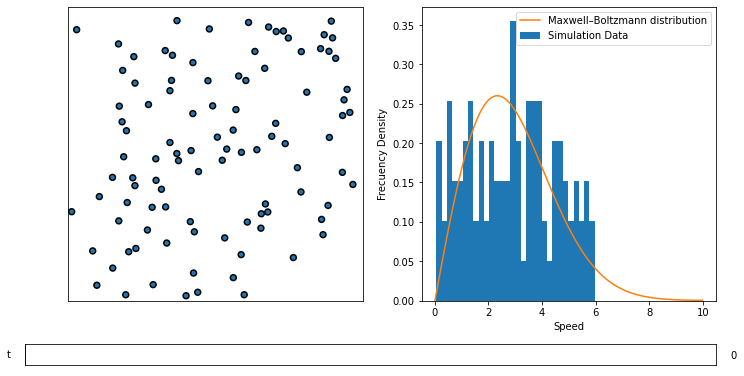

In [ ]:
import numpy as np




class Particle:
    """Define physics of elastic collision."""
    
    def __init__(self, mass, radius, position, velocity):
        """Initialize a Particle object
        
        mass the mass of particle
        radius the radius of particle
        position the position vector of particle
        velocity the velocity vector of particle
        """
        self.mass = mass
        self.radius = radius
        
        # last position and velocity
        self.position = np.array(position)
        self.velocity = np.array(velocity)
        
        # all position and velocities recorded during the simulation
        self.solpos = [np.copy(self.position)]
        self.solvel = [np.copy(self.velocity)]
        self.solvel_mag = [np.linalg.norm(np.copy(self.velocity))]
        
    def compute_step(self, step):
        """Compute position of next step."""
        self.position += step * self.velocity
        self.solpos.append(np.copy(self.position)) 
        self.solvel.append(np.copy(self.velocity)) 
        self.solvel_mag.append(np.linalg.norm(np.copy(self.velocity))) 
        

    
    
    def check_coll(self, particle):
        """Check if there is a collision with another particle."""
        
        r1, r2 = self.radius, particle.radius
        x1, x2 = self.position, particle.position
        di = x2-x1
        norm = np.linalg.norm(di)
        if norm-(r1+r2)*1.1 < 0:
            return True
        else:
            return False

    
    def compute_coll(self, particle, step):
        """Compute velocity after collision with another particle."""
        m1, m2 = self.mass, particle.mass
        r1, r2 = self.radius, particle.radius
        v1, v2 = self.velocity, particle.velocity
        x1, x2 = self.position, particle.position
        di = x2-x1
        norm = np.linalg.norm(di)
        if norm-(r1+r2)*1.1 < step*abs(np.dot(v1-v2, di))/norm:
            self.velocity = v1 - 2. * m2/(m1+m2) * np.dot(v1-v2, di) / (np.linalg.norm(di)**2.) * di
            particle.velocity = v2 - 2. * m1/(m2+m1) * np.dot(v2-v1, (-di)) / (np.linalg.norm(di)**2.) * (-di)
            

    def compute_refl(self, step, size):
        """Compute velocity after hitting an edge.
        step the computation step
        size the medium size
        """
        r, v, x = self.radius, self.velocity, self.position
        projx = step*abs(np.dot(v,np.array([1.,0.])))
        projy = step*abs(np.dot(v,np.array([0.,1.])))
        if abs(x[0])-r < projx or abs(size-x[0])-r < projx:
            self.velocity[0] *= -1
        if abs(x[1])-r < projy or abs(size-x[1])-r < projy:
            self.velocity[1] *= -1.


def solve_step(particle_list, step, size):
    """Solve a step for every particle."""
    
    # Detect edge-hitting and collision of every particle
    for i in range(len(particle_list)):
        particle_list[i].compute_refl(step,size)
        for j in range(i+1,len(particle_list)):
                particle_list[i].compute_coll(particle_list[j],step)    

                
    # Compute position of every particle  
    for particle in particle_list:
        particle.compute_step(step)




################################################################################################################################





def init_list_random(N, radius, mass, boxsize):
    """Generate N Particle objects in a random way in a list."""
    particle_list = []

    for i in range(N):
        
        v_mag = np.random.rand(1)*6
        v_ang = np.random.rand(1)*2*np.pi
        v = np.append(v_mag*np.cos(v_ang), v_mag*np.sin(v_ang))
        
        collision = True
        while(collision == True):
            
            collision = False
            pos = radius + np.random.rand(2)*(boxsize-2*radius) 
            newparticle = Particle(mass, radius, pos, v)
            for j in range(len(particle_list)):

                collision = newparticle.check_coll( particle_list[j] )

                if collision == True:
                    break

        particle_list.append(newparticle)
    return particle_list



particle_number = 100
boxsize = 200.

# You need a larger tfin and stepnumber to get the equilibrium state. But the computation takes more time.
tfin = 10
stepnumber = 150

timestep = tfin/stepnumber

particle_list = init_list_random(particle_number, radius = 2, mass = 1, boxsize = 200)

# Compute simulation (It takes some time if stepnumber and particle_number are large)
for i in range(stepnumber):
    solve_step(particle_list, timestep, boxsize)
    #print(i)






################################################################################################################################


# Visualization of the solution with matplotlib. It use a slider to change the time


import matplotlib.pyplot as plt


fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1,2,1)

hist = fig.add_subplot(1,2,2)

plt.subplots_adjust(bottom=0.2,left=0.15)

ax.axis('equal')
ax.axis([-1, 30, -1, 30])

ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.set_xlim([0,boxsize])
ax.set_ylim([0,boxsize])

# Draw Particles as circles
circle = [None]*particle_number
for i in range(particle_number):
    circle[i] = plt.Circle((particle_list[i].solpos[0][0], particle_list[i].solpos[0][1]), particle_list[i].radius, ec="black", lw=1.5, zorder=20)
    ax.add_patch(circle[i])

# Graph Particles speed histogram
vel_mod = [particle_list[i].solvel_mag[0] for i in range(len(particle_list))]
hist.hist(vel_mod, bins= 30, density = True, label = "Simulation Data")
hist.set_xlabel("Speed")
hist.set_ylabel("Frecuency Density")



# Compute 2d Boltzmann distribution

#total energy should be constant for any time index
def total_Energy(particle_list, index): 
    return sum([particle_list[i].mass / 2. * particle_list[i].solvel_mag[index]**2  for i in range(len(particle_list))])


E = total_Energy(particle_list, 0)
Average_E = E/len(particle_list) 
k = 1.38064852e-23
T = 2*Average_E/(2*k)
m = particle_list[0].mass
v = np.linspace(0,10,120)
fv = m*np.exp(-m*v**2/(2*T*k))/(2*np.pi*T*k)*2*np.pi*v
hist.plot(v,fv, label = "Maxwell–Boltzmann distribution") 
hist.legend(loc ="upper right")


from matplotlib.widgets import Slider

slider_ax = plt.axes([0.1, 0.05, 0.8, 0.05])
slider = Slider(slider_ax,      # the axes object containing the slider
                  't',            # the name of the slider parameter
                  0,          # minimal value of the parameter
                  tfin,          # maximal value of the parameter
                  valinit=0,  # initial value of the parameter 
                  color = '#5c05ff' 
                 )

def update(time):
    i = int(np.rint(time/timestep))
    
    #ax.set_title('Energy =' + str(Energy[i]))
    
    # Draw Particles as circles
    for j in range(particle_number):
        circle[j].center = particle_list[j].solpos[i][0], particle_list[j].solpos[i][1]
    hist.clear()    
    
    # Graph Particles speed histogram
    vel_mod = [particle_list[j].solvel_mag[i] for j in range(len(particle_list))]
    hist.hist(vel_mod, bins= 30, density = True, label = "Simulation Data")
    hist.set_xlabel("Speed")
    hist.set_ylabel("Frecuency Density")
    
    # Compute 2d Boltzmann distribution
    E = total_Energy(particle_list, i)
    Average_E = E/len(particle_list) 
    k = 1.38064852e-23
    T = 2*Average_E/(2*k)
    m = particle_list[0].mass
    v = np.linspace(0,10,120)
    fv = m*np.exp(-m*v**2/(2*T*k))/(2*np.pi*T*k)*2*np.pi*v
    hist.plot(v,fv, label = "Maxwell–Boltzmann distribution") 
    hist.legend(loc ="upper right")
    
slider.on_changed(update)
plt.show()

In [ ]:
import tkinter as tk

# Create the main application window
root = tk.Tk()
root.title("Simple UI Example")

# Create a label widget
label = tk.Label(root, text="Hello, Tkinter!")
label.pack()

# Create a button widget
def on_button_click():
    label.config(text="Button Clicked!")

button = tk.Button(root, text="Click Me", command=on_button_click)
button.pack()

# Run the main event loop
root.mainloop()


In [ ]:
vel = np.array([2.0,5.0])
print(vel)
pos = np.array([10.0,15.0])
vel += pos + (vel*dt) 

In [ ]:
print(vel)

In [ ]:
def colisao_elastica(particula_1,particula_2):
    
    ######################init check###############################
    #check será realziado no script, deixei aqui caso for preciso voltar
    #soma_raios = particula_1.raio + particula_2.raio #soma dos raios
    
    #distancia_euclidiana = math.sqrt((particula_2.posicao[0] - particula_1.posicao[0])**2 + (particula_2.posicao[1] - particula_1.posicao[1])**2)
    #if distancia_euclidiana < soma_raios:
    
    ####################end check##################################
    
    lambda_x = particula_1.posicao[0] - particula_2.posicao[0] #numero
    lambda_y = particula_1.posicao[1] - particula_2.posicao[1] #numero
    
    lambda_vel_x = particula_1.velocidade[0] - particula_2.posicao[0] #numero
    lambda_vel_y = particula_1.velocidade[1] - particula_2.posicao[1] #numero
    
    vet_pos = np.array([lambda_x, lambda_y]) #vetor
    vet_vel = np.array([lambda_vel_x, lambda_vel_y]) #vetor
        #print("done - ",vet_vel*vet_pos)
    
    impulso = (2*particula_1.massa * particula_2.massa * (np.inner(vet_vel,vet_pos))) / (soma_raios * (particula_1.massa + particula_2.massa)) #impulso inelastico
    
    impulso_x = (impulso*lambda_x)/soma_raios #impulso no eixo x
    impulso_y = (impulso*lambda_y)/soma_raios #impulso no eito y
    
    
    vr_p1_x = particula_1.velocidade[0] + (impulso_x/particula_1.massa) #velocidade resultante particula 1 no eixo x
    vr_p1_y = particula_1.velocidade[1] + (impulso_y/particula_1.massa)
    
    vr_p2_x = particula_2.velocidade[0] - (impulso_x/particula_2.massa) #velocidade resultante particula 2 no eixo x
    vr_p2_y = particula_2.velocidade[1] - (impulso_y/particula_2.massa)
    
    vetor_vel_p1 = np.array([vr_p1_x, vr_p1_y]) #conversão em vetor
    vetor_vel_p2 = np.array([vr_p2_x,vr_p2_y])
        
        
    return vetor_vel_p1,vetor_vel_p2

In [ ]:
# GUI setup

num_particles = 2
particulas = caracterizar_particulas(num_particles,tamanho_caixa)

root = tk.Tk()
root.title("Particle Collision Simulation")
canvas.delete("all")

canvas = tk.Canvas(root, width=largura_caixa, height=altura_caixa, bg="white")
canvas.pack()

gerar_particulas(particulas,dt)

root.mainloop()